In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/Deep_Learning/bloodcell_2'))

['9 acantocyte 354', '8 SPERO bulat 562', '7 hypochromic 222', '6 TARGETSEL 851', '5 stomatocyte 382', '4 normal 1426', '3 teardrop 2076', '2 pencil 24', '1 Elliptocyte 1211']


In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [ ]:
X=[]
Z=[]
IMG_SIZE= 55
ACANTOCYTE_DIR='/content/drive/MyDrive/Deep_Learning/bloodcell_2/9 acantocyte 354'
SPERO_DIR='/content/drive/MyDrive/Deep_Learning/bloodcell_2/8 SPERO bulat 562'
HYPOCHROMIC_DIR='/content/drive/MyDrive/Deep_Learning/bloodcell_2/7 hypochromic 222'
TARGET_DIR='/content/drive/MyDrive/Deep_Learning/bloodcell_2/6 TARGETSEL 851'
STOMATOCYTE_DIR='/content/drive/MyDrive/Deep_Learning/bloodcell_2/5 stomatocyte 382'
NORMAL_DIR='/content/drive/MyDrive/Deep_Learning/bloodcell_2/4 normal 1426'
TEARDROP_DIR='/content/drive/MyDrive/Deep_Learning/bloodcell_2/3 teardrop 2076'
PENCIL_DIR='/content/drive/MyDrive/Deep_Learning/bloodcell_2/2 pencil 24'
ELLIPTOCYTE_DIR='/content/drive/MyDrive/Deep_Learning/bloodcell_2/1 Elliptocyte 1211'

In [ ]:
def assign_label(img,blood_type):
    return blood_type

In [ ]:
from numpy.lib.type_check import imag
import cv2
import numpy as np
import random

# Fungsi untuk melakukan rotasi gambar 90 derajat
def rotate_90(img):
    return np.rot90(img)

# Fungsi untuk melakukan rotasi gambar 180 derajat
def rotate_180(img):
    return np.rot90(img, 2)

# Fungsi untuk melakukan rotasi gambar 270 derajat
def rotate_270(img):
    return np.rot90(img, 3)

In [ ]:
#def make_train_data(blood_type,DIR):
#    for img in tqdm(os.listdir(DIR)):
#        label=assign_label(img,blood_type)
#        path = os.path.join(DIR,img)
#        img = cv2.imread(path,cv2.IMREAD_COLOR)
#        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
#
#        X.append(np.array(img))
#        Z.append(str(label))


def make_train_data(blood_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, blood_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        # Menerapkan augmentasi gambar
        augmented_image = img
        augmented_image_rot90 = rotate_90(augmented_image)
        augmented_image_rot180 = rotate_180(augmented_image)
        augmented_image_rot270 = rotate_270(augmented_image)

        X.append(np.array(img))
        Z.append(str(label))

        X.append(np.array(augmented_image_rot90))
        Z.append(str(label))

        X.append(np.array(augmented_image_rot180))
        Z.append(str(label))

        X.append(np.array(augmented_image_rot270))
        Z.append(str(label))

In [ ]:
make_train_data('Acantocyte',ACANTOCYTE_DIR)
print(len(X))
make_train_data('Spero',SPERO_DIR)
print(len(X))
make_train_data('Hypochromic',HYPOCHROMIC_DIR)
print(len(X))
make_train_data('Target',TARGET_DIR)
print(len(X))
make_train_data('Stomtocyte',STOMATOCYTE_DIR)
print(len(X))
make_train_data('Normal',NORMAL_DIR)
print(len(X))
make_train_data('Teardrop',TEARDROP_DIR)
print(len(X))
make_train_data('Pencil',PENCIL_DIR)
print(len(X))
make_train_data('Elliptocyte',ELLIPTOCYTE_DIR)
print(len(X))

100%|██████████| 354/354 [00:01<00:00, 217.70it/s]


1416


100%|██████████| 572/572 [00:02<00:00, 220.53it/s]


3704


100%|██████████| 222/222 [00:01<00:00, 136.72it/s]


4592


100%|██████████| 851/851 [00:05<00:00, 163.03it/s]


7996


100%|██████████| 391/391 [00:01<00:00, 215.59it/s]


9560


100%|██████████| 1426/1426 [00:04<00:00, 303.25it/s]


15264


100%|██████████| 2086/2086 [00:09<00:00, 216.66it/s]


23608


100%|██████████| 24/24 [00:00<00:00, 329.23it/s]


23704


100%|██████████| 1211/1211 [00:08<00:00, 145.52it/s]

28548


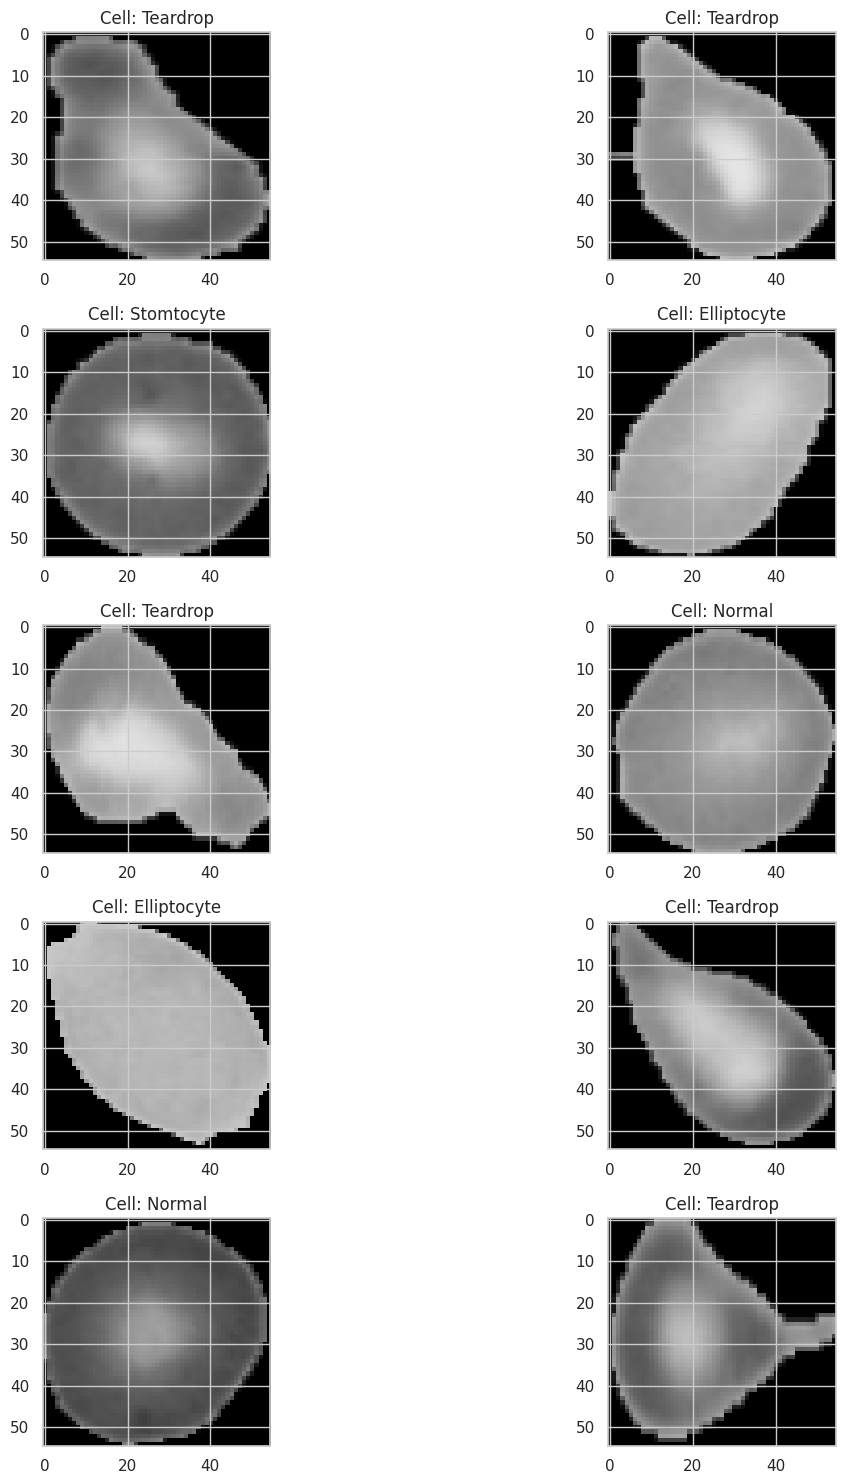

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Cell: '+Z[l])

plt.tight_layout()

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,9)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [ ]:
 # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (55,55,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(9, activation = "softmax"))

In [ ]:
batch_size=64
epochs=15

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 96)          0

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/15
356/356 [==============================] - 43s 84ms/step - loss: 1.2419 - accuracy: 0.5547 - val_loss: 0.6900 - val_accuracy: 0.7564
Epoch 2/15
356/356 [==============================] - 33s 93ms/step - loss: 0.7412 - accuracy: 0.7444 - val_loss: 0.4758 - val_accuracy: 0.8303
Epoch 3/15
356/356 [==============================] - 29s 80ms/step - loss: 0.5298 - accuracy: 0.8193 - val_loss: 0.2954 - val_accuracy: 0.9018
Epoch 4/15
356/356 [==============================] - 29s 82ms/step - loss: 0.4110 - accuracy: 0.8575 - val_loss: 0.2679 - val_accuracy: 0.9082
Epoch 5/15
356/356 [==============================] - 29s 81ms/step - loss: 0.3567 - accuracy: 0.8772 - val_loss: 0.2472 - val_accuracy: 0.9147
Epoch 6/15
356/356 [==============================] - 28s 80ms/step - loss: 0.3153 - accuracy: 0.8920 - val_loss: 0.2431 - val_accuracy: 0.9116
Epoch 7/15
356/356 [==============================] - 28s 79ms/step - loss: 0.2886 - accuracy: 0.8981 - val_loss: 0.2564 - val_accuracy:

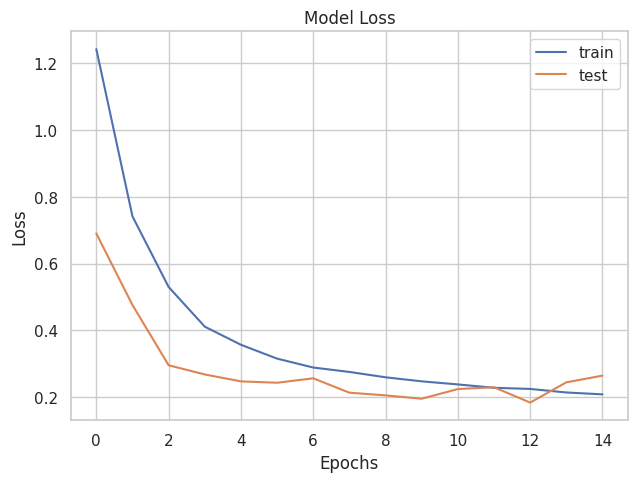

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

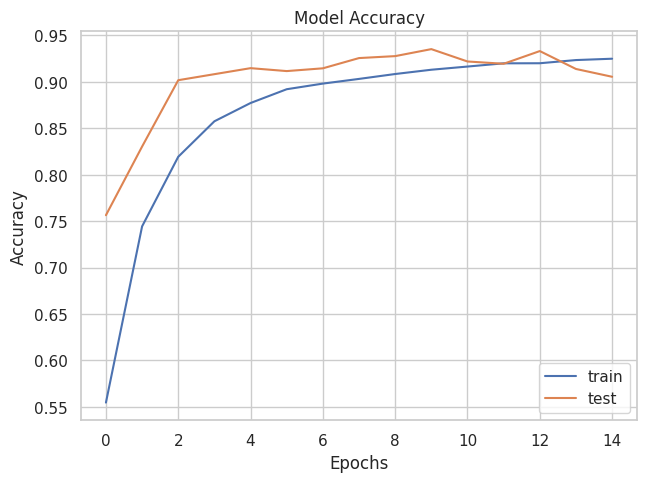

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

179/179 [==============================] - 1s 3ms/step


In [ ]:
pred_digits

array([3, 6, 6, ..., 1, 3, 7])

In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

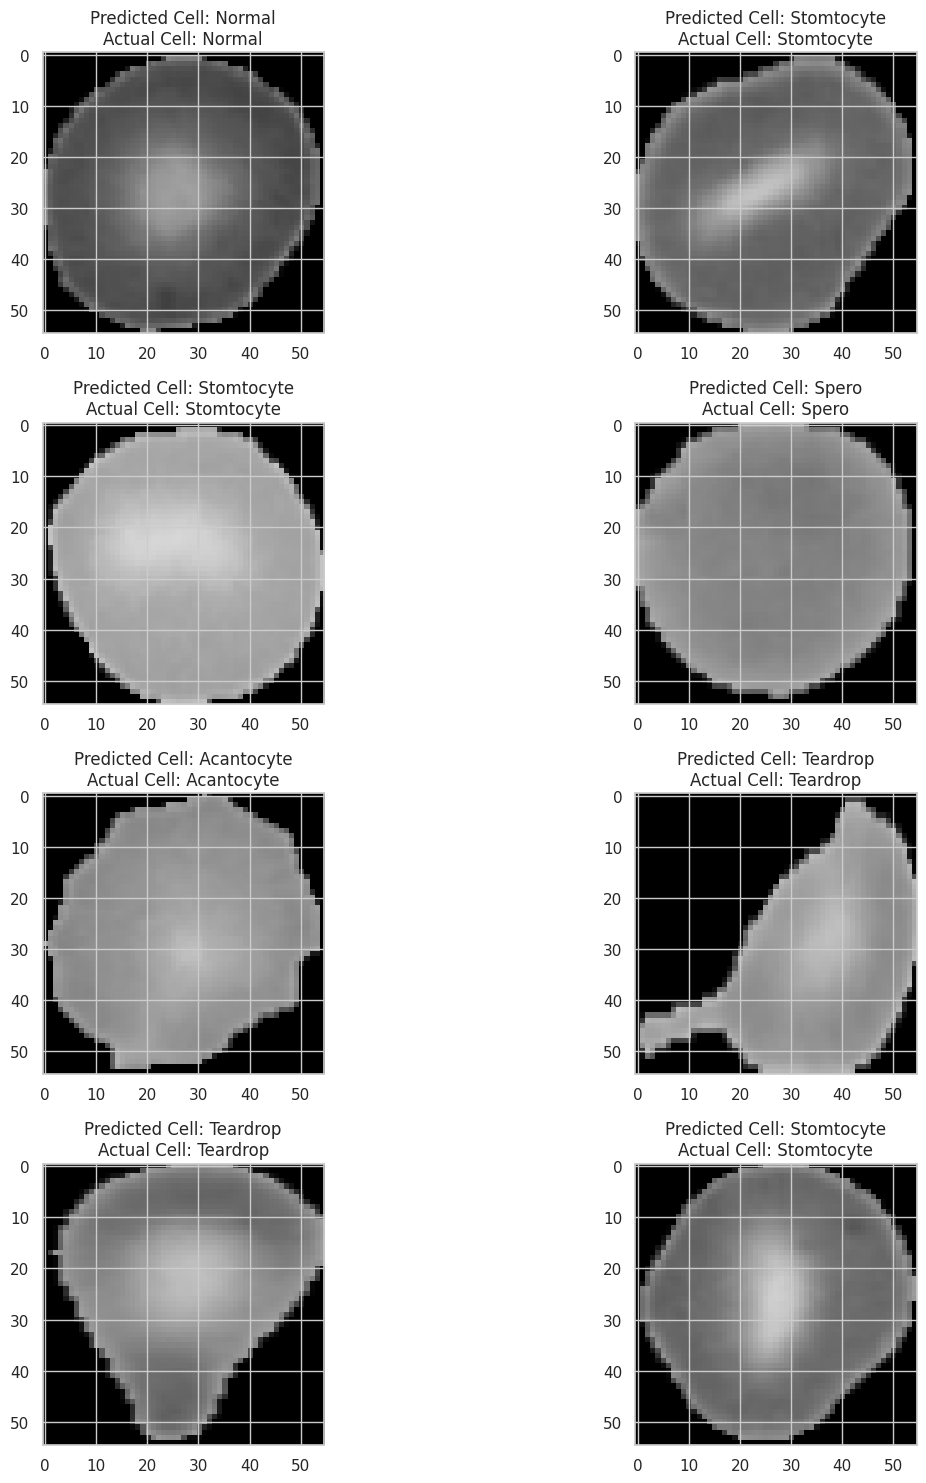

In [ ]:
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)

for i in range(4):
    for j in range(2):
        index = prop_class[count]
        ax[i, j].imshow(x_test[index])

        # Ubah prediksi dan label aktual menjadi 1D array
        predicted_label = le.inverse_transform([pred_digits[index]])[0]
        actual_label = le.inverse_transform([np.argmax(y_test[index])])[0]

        ax[i, j].set_title("Predicted Cell: " + predicted_label + "\nActual Cell: " + actual_label)

        count += 1

plt.tight_layout()
plt.show()


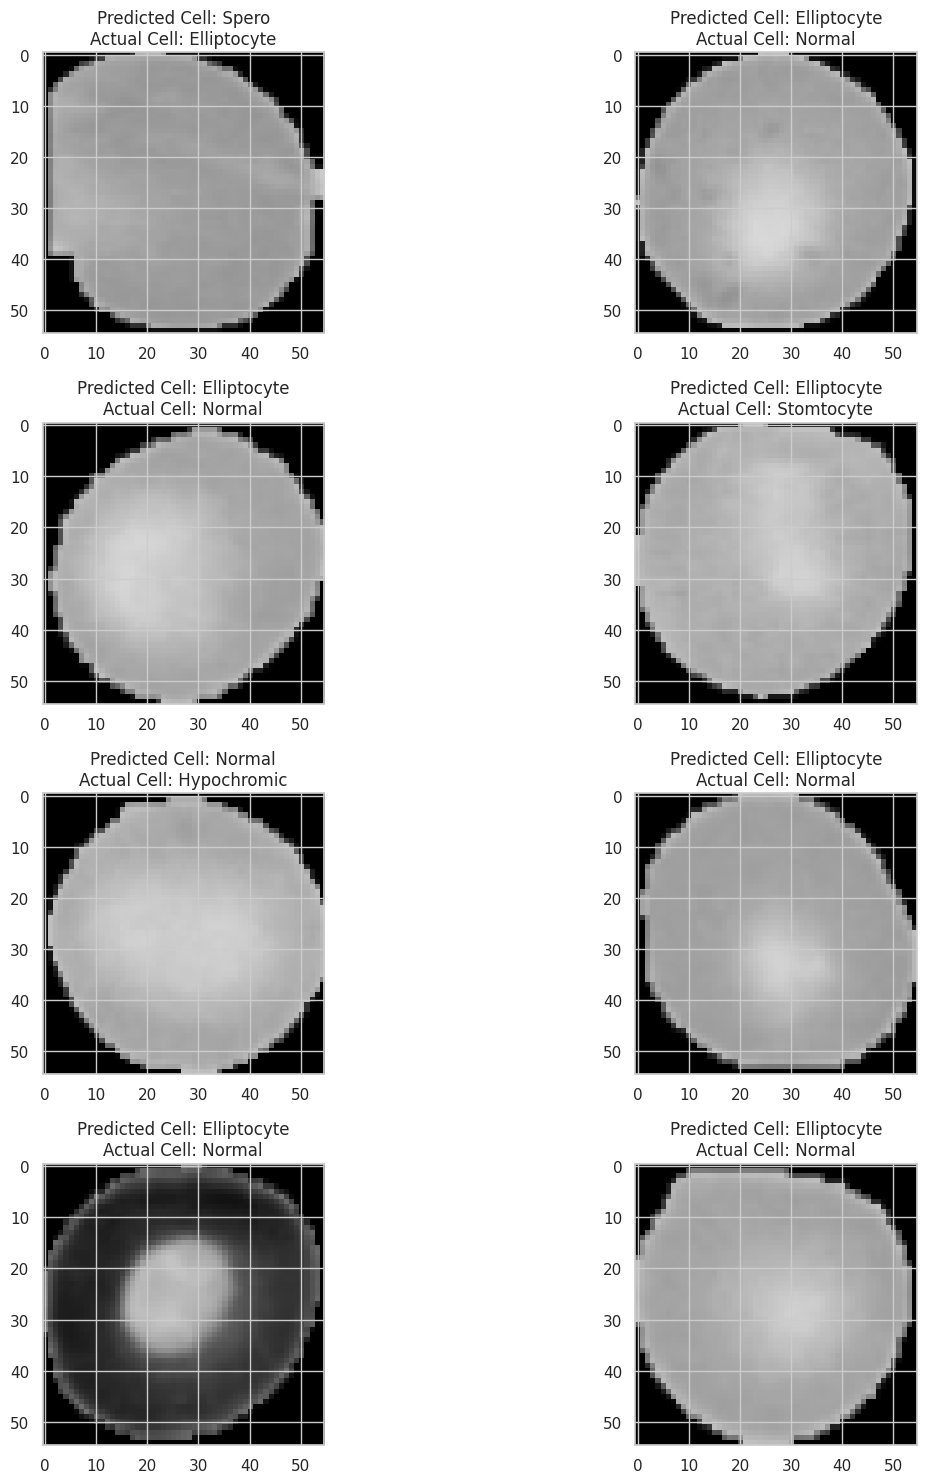

In [ ]:
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)
for i in range(4):
    for j in range(2):
        index = mis_class[count]
        ax[i, j].imshow(x_test[index])

        # Extract predicted label and actual label as 1D arrays
        predicted_label = le.inverse_transform([pred_digits[index]])[0]
        actual_label = le.inverse_transform([np.argmax(y_test[index])])[0]

        ax[i, j].set_title("Predicted Cell: " + predicted_label + "\nActual Cell: " + actual_label)

        count += 1

plt.tight_layout()
plt.show()
